In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
# 可以通过for循环看不同包的版本
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
# fashion_mnist图像分类数据集
fashion_mnist = keras.datasets.fashion_mnist

(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
#前面5000张是验证集，后面55000张是训练集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

#得到的是np，训练集，验证集，测试集
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [3]:
28*28  #如果非要对应多少特征，就是784个特征

784

In [4]:
type(x_train)

numpy.ndarray

In [5]:
#看一下第二个样本的标签值
y_train[2]

7

In [6]:
y_train.max()

9

In [7]:
y_train.min()

0

In [8]:
x_train[0]  #像素值是0-255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

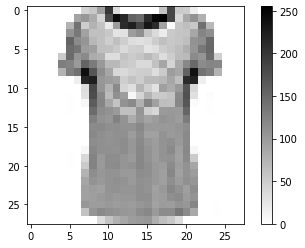

--------------------------------------------------
184
0
0


In [9]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")  #imshow是根据像素值打印图片
    plt.colorbar()  #旁边显示一个色阶条
    plt.show()


#依次看一下x_train[0]，x_train[1]，x_train[2]就可以理解下面的循环
show_single_image(x_train[1])
print('-'*50)
print(x_train[1,0,18])  #0是纵坐标，18是横坐标的值
print(x_train[1,18,0]) 
print(y_train[1])

In [10]:
y_train[0]

4

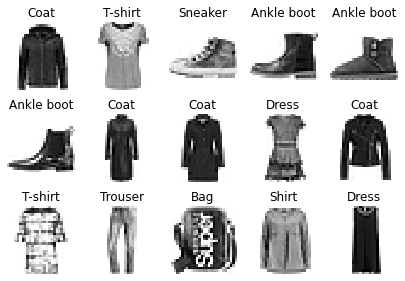

In [11]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)  #x和y的样本数一致
    assert n_rows * n_cols < len(x_data)  #确保打印的图片小于总样本数
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))  #宽1.4高1.6
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col  #通过行和列算出来第几个样本
            plt.subplot(n_rows, n_cols, index+1)#因为从1开始
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')#去除坐标系
            plt.title(class_names[y_data[index]])
    plt.show()
#已知的图片类别
# lables在这个路径https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
#只是打印了前15个样本
show_imgs(3, 5, x_train, y_train, class_names)


In [12]:
#这里是为了看均匀分布
np.sqrt(6/(784+300))

0.07439795259651642

In [13]:
# tf.keras.models.Sequential(),可以看下官网
# 功能：Sequential将线性的层堆叠到一个tf.keras.Model

model = keras.models.Sequential()
#把28*28的图片展平为一个一维向量,通过下面打印可以看到两个想乘，784
model.add(keras.layers.Flatten(input_shape=[28, 28]))
print(model.output_shape)
#Dense是全连接层，添加全连接层，单元数是300，可以对比300和100的差异
# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
model.add(keras.layers.Dense(300, activation="relu"))
print(model.output_shape)
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) #10个神经元


# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])



# reason for sparse: y->index. y->one_hot->[] 
#loss是损失函数 y如果只是一个数，那么使用sparse_categorical_crossentropy
#sparse_categorical_crossentropy计算稀疏分类crossentropy损失。
# 计算的分类值是 0,1,2,...9
# 如果是一个向量，那么使用categorical_crossentropy，详情看课件
#optimizer是优化方法
# metrics模型在训练和测试期间要评估的指标列表
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

(None, 784)
(None, 300)


In [14]:
model.layers  #总计有4层

In [15]:
#可以来算一下参数个数
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
784*300+300

235500

In [17]:
300*100+100

30100

In [18]:
100*10+10

1010

In [19]:
model.variables  #模型中自己训练的参数

[<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[-0.04138263, -0.06890097,  0.04159823, ..., -0.0212847 ,
         -0.0164175 , -0.00937504],
        [ 0.00673604,  0.0148123 ,  0.0440376 , ...,  0.04626467,
         -0.04619006, -0.06010287],
        [-0.00424779, -0.01992644,  0.03487867, ...,  0.06252451,
         -0.03830069, -0.01062118],
        ...,
        [ 0.03943769, -0.02215635, -0.07251472, ..., -0.04235803,
         -0.01363956,  0.07050517],
        [-0.03217473, -0.01165827, -0.00234275, ...,  0.03300367,
         -0.06454042, -0.04410116],
        [ 0.04711777, -0.01555511, -0.02946641, ...,  0.0408968 ,
         -0.00052045, -0.01068982]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [20]:
model.variables[0]

<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[-0.04138263, -0.06890097,  0.04159823, ..., -0.0212847 ,
        -0.0164175 , -0.00937504],
       [ 0.00673604,  0.0148123 ,  0.0440376 , ...,  0.04626467,
        -0.04619006, -0.06010287],
       [-0.00424779, -0.01992644,  0.03487867, ...,  0.06252451,
        -0.03830069, -0.01062118],
       ...,
       [ 0.03943769, -0.02215635, -0.07251472, ..., -0.04235803,
        -0.01363956,  0.07050517],
       [-0.03217473, -0.01165827, -0.00234275, ...,  0.03300367,
        -0.06454042, -0.04410116],
       [ 0.04711777, -0.01555511, -0.02946641, ...,  0.0408968 ,
        -0.00052045, -0.01068982]], dtype=float32)>

In [21]:
model.trainable_variables  #和上面variables一致

[<tf.Variable 'dense/kernel:0' shape=(784, 300) dtype=float32, numpy=
 array([[-0.04138263, -0.06890097,  0.04159823, ..., -0.0212847 ,
         -0.0164175 , -0.00937504],
        [ 0.00673604,  0.0148123 ,  0.0440376 , ...,  0.04626467,
         -0.04619006, -0.06010287],
        [-0.00424779, -0.01992644,  0.03487867, ...,  0.06252451,
         -0.03830069, -0.01062118],
        ...,
        [ 0.03943769, -0.02215635, -0.07251472, ..., -0.04235803,
         -0.01363956,  0.07050517],
        [-0.03217473, -0.01165827, -0.00234275, ...,  0.03300367,
         -0.06454042, -0.04410116],
        [ 0.04711777, -0.01555511, -0.02946641, ...,  0.0408968 ,
         -0.00052045, -0.01068982]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(300,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [22]:
#均匀分布
np.sqrt(6/(300+100))

0.1224744871391589

In [23]:
model.variables[0].numpy().max()

0.07439785

In [24]:
np.sqrt(6/100)

0.2449489742783178

In [25]:
model.variables[2].numpy().max()

0.122474246

In [26]:
55000/20

2750.0

In [27]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]
#W是矩阵，b是一个偏置，是一个向量

In [28]:
#20次epoch，是指用55000样本训练20次，每一次的训练时，一次输入32个样本，batch_size
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))  

Epoch 1/20
1719/1719 [==============================] - 10s 6ms/step - loss: 2.4479 - accuracy: 0.7056 - val_loss: 0.6833 - val_accuracy: 0.7682
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5929 - accuracy: 0.7852 - val_loss: 0.6189 - val_accuracy: 0.7894
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5199 - accuracy: 0.8126 - val_loss: 0.5278 - val_accuracy: 0.8224
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4783 - accuracy: 0.8279 - val_loss: 0.5286 - val_accuracy: 0.8246
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4461 - accuracy: 0.8391 - val_loss: 0.4903 - val_accuracy: 0.8418
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4220 - accuracy: 0.8472 - val_loss: 0.4807 - val_accuracy: 0.8432
Epoch 7/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4030 - accuracy: 0.8539 - val_loss: 0.4603 - val_accuracy

In [29]:
type(history)

tensorflow.python.keras.callbacks.History

In [30]:
#十次历史的信息
history.history

{'loss': [2.4478726387023926,
  0.5929071307182312,
  0.5198966264724731,
  0.47833919525146484,
  0.4460873305797577,
  0.42197856307029724,
  0.40302643179893494,
  0.3883298635482788,
  0.37627097964286804,
  0.3655221164226532,
  0.3578324615955353,
  0.34969523549079895,
  0.34260958433151245,
  0.3355407416820526,
  0.3293275237083435,
  0.3234591484069824,
  0.31755873560905457,
  0.31191933155059814,
  0.30803096294403076,
  0.3019133508205414],
 'accuracy': [0.7055818438529968,
  0.7852363586425781,
  0.8126363754272461,
  0.8279091119766235,
  0.8390727043151855,
  0.8471636176109314,
  0.8538545370101929,
  0.8574181795120239,
  0.8619636297225952,
  0.8664727210998535,
  0.868327260017395,
  0.8708000183105469,
  0.8740181922912598,
  0.8751272559165955,
  0.8772545456886292,
  0.8796908855438232,
  0.8819090723991394,
  0.8833272457122803,
  0.8846727013587952,
  0.8862181901931763],
 'val_loss': [0.6832503080368042,
  0.618878185749054,
  0.5278428196907043,
  0.528579711

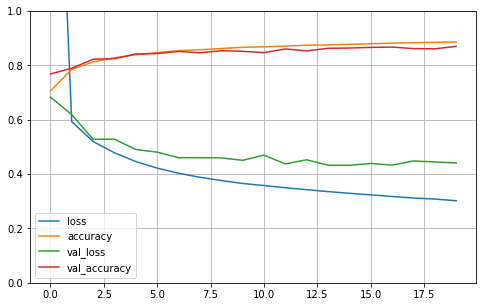

In [31]:
#画线要注意的是损失是不一定在零到1之间的
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))  #使用df中的折线图绘制
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  #纵坐标的刻度范围
    plt.show()

plot_learning_curves(history)  #横坐标是epochs

In [32]:
#在测试集上评估，一个是测试集的损失，一个是测试集的准确率
model.evaluate(x_test, y_test, verbose=0)

[0.4475978910923004, 0.8550000190734863]

In [28]:
#计算标签和预测之间的crossentropy(交叉熵)损失
cce = keras.losses.SparseCategoricalCrossentropy()
loss = cce(
  [0, 1, 2],
  [[.9, .05, .05], [.05, .89, .06], [.05, .01, .94]])
print('Loss: ', loss.numpy())  

Loss:  0.09458992


In [ ]:
-log0.9

In [29]:
#softmax计算
import numpy as np
z = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
m=np.exp(z)/sum(np.exp(z))
m

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])